halts= 2
w= [ 0.   1.3 -0.8]
r= -0.24
r= -0.69
r= -0.41999999999999993
r= -0.79
r= -0.5700000000000003
r= -0.6299999999999999
r= 0.12
r= 0.0


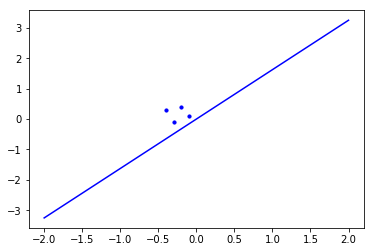

[(1, -0.4, 0.3), (1, -0.3, -0.1), (1, -0.2, 0.4), (1, -0.1, 0.1)]


In [27]:
import matplotlib.pyplot as plt
import numpy as np

#網路上找的dataset 可以線性分割

dataset = np.array([
((1, -0.4, 0.3), -1),
((1, -0.3, -0.1), -1),
((1, -0.2, 0.4), -1),
((1, -0.1, 0.1), -1),
((1, 0.9, -0.5), 1),
((1, 0.7, -0.9), 1),
((1, 0.8, 0.2), 1),
((1, 0.4, -0.6), 1)])
w = np.zeros(3)
eta = 1
halts = 0
for x,y in dataset:
    x = np.array(x)
    score = w.T.dot(x)
    #print('sign=%s,y=%s'% (np.sign(score),y) )
    if int( np.sign(score) )!= y:
        halts +=1
        w += y*x
        
print('halts=',halts)
print('w=',w)
for x,y in dataset:
    print('r=',y-w.T.dot(x))
ps = [v[0] for v in dataset]
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter( [v[1] for v in ps[:4]] , [v[2] for v in ps[:4]], s=10, c='b', marker="o", label='O')
l = np.linspace(-2,2)
a,b = -w[1]/w[2], -w[0]/w[2]
ax1.plot(l, a*l + b, 'b-')
plt.show()
print(ps[:4])

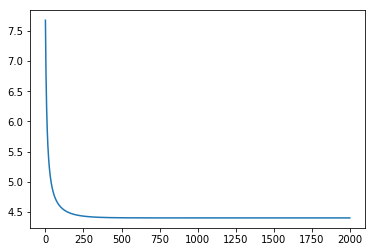

[-1.31700989  5.31604972 -2.70932851]


In [39]:
import matplotlib.pyplot as plt
import numpy as np

dataset = np.array([
((1, -0.4, 0.3), 0),
((1, -0.3, -0.1), 0),
((1, -0.2, 0.4), 0),
((1, -0.1, 0.1), 0),
((1, 0.6, -0.5), 0), #非線性分割點

((1, 0.8, 0.7), 1),
((1, 0.9, -0.5), 1),
((1, 0.7, -0.9), 1),
((1, 0.8, 0.2), 1),
((1, 0.4, -0.6), 1)])
#網路上找的dataset 可以線性分割
#計算機率函數

def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    
#計算平均梯度

def gradient(dataset, w):
    g = np.zeros(len(w))
    for x,y in dataset:
        x = np.array(x)
        error = sigmoid(-y*w.T.dot(x))
        g += error*(-y*x)
    return g / len(dataset)
def cost(dataset, w):
    total_cost = 0
    for x,y in dataset:
        x = np.array(x)
        score = sigmoid(w.T.dot(x))
        total_cost += abs(y - score)
    return total_cost

dataset = np.array([
((1, -0.4, 0.3), -1),
((1, -0.3, -0.1), -1),
((1, -0.2, 0.4), -1),
((1, -0.1, 0.1), -1),
((1, 0.9, -0.5), 1),
((1, 0.7, -0.9), 1),
((1, 0.8, 0.2), 1),
((1, 0.4, -0.6), 1)])
w = np.zeros(3)

limit = 2000 #更新十次後停下

eta = 1 #更新幅度

costs = [] #紀錄每次更新權重後新的cost是多少

for i in range(limit):
    w = w - eta * gradient(dataset, w)
    current_cost = cost(dataset, w)
    #print ("current_cost=",current_cost)
    costs.append(current_cost)
    eta *= 0.99 #更新幅度，逐步遞減
plt.plot(range(limit), costs)
plt.show()
print(w)

In [66]:
import numpy as np 
rand = np.random.RandomState()
X = rand.randint(4, size=(2,2))
print('x=\n',X)
print(np.newaxis)
R =[]
for x1 ,x2 in X:
    r = x1**2 + x2**2
    R.append(r)
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :] 
print('dx\n',differences)
print('dx**2\n',differences.sum(-1))

x=
 [[0 1]
 [2 3]]
None
dx
 [[[ 0  0]
  [-2 -2]]

 [[ 2  2]
  [ 0  0]]]
dx**2
 [[ 0 -4]
 [ 4  0]]
